In [5]:
# classifies whether the patient has chronic kidney disease or not using Artificial Neural Networks (ANN)


In [6]:
#import libraries

import glob
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [7]:
#load the data
from google.colab import files        #this library allows us to upload the files from our system
uploaded=files.upload()
df=pd.read_csv('kidney_disease.csv')

#printing the first 5 rows of the dataset
df.head()    #  .head() will prints the first 5 rowa of the dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
"""
columns or datapoints full forms in the dataset
age - age of the person/patient
bp - blood pressure of the patient
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pests cell
pcc - pest cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum christening
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - pet cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes milletus
cad - cardinary artery disease
appet - appetite
pe - pedal adema
ane - anemia
classification (ckd) is chronic kidney disease
"""

'\ncolumns or datapoints full forms in the dataset\nage - age of the person/patient\nbp - blood pressure of the patient\nsg - specific gravity \nal - albumin\nsu - sugar\nrbc - red blood cells\npc - pests cell\npcc - pest cell clumps\nba - bacteria\nbgr - blood glucose random\nbu - blood urea\nsc - serum christening\nsod - sodium\npot - potassium\nhemo - hemoglobin\npcv - pet cell volume\nwc - white blood cell count\nrc - red blood cell count\nhtn - hypertension\ndm - diabetes milletus\ncad - cardinary artery disease\nappet - appetite\npe - pedal adema\nane - anemia\nclassification (ckd) is chronic kidney disease \n'

In [9]:
#getting the shape of the data  ( the no of rows and colmns )
df.shape
#from the output -- we have 400 patients and 26 data points on each patient

(400, 26)

In [10]:
# creating a list of column names to keep
columns_to_retain=['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

#drop the columns that are not in the columns_to_retain list
df=df.drop( [ col for col in df.columns if not col in columns_to_retain], axis=1)

#drop the  rows with na or missing values
df=df.dropna(axis=0)

In [11]:
#transforming the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-11-b3ccf8108205>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-11-b3ccf8108205>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-11-b3ccf8108205>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [12]:
#printing the first 5 rows of the cleaned dataset
df.head()
#output below here
#in classification 0 indicates the person has chronic kidney disease

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['al'].plot(kind='hist', bins=20, title='al')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sc'].plot(kind='hist', bins=20, title='sc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sg', y='al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='al', y='sc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sc', y='hemo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['al']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('al')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['hemo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('hemo')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['al'].plot(kind='line', figsize=(8, 4), title='al')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['sc'].plot(kind='line', figsize=(8, 4), title='sc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
#splitting the data into independent (X) data set(the features) and dependent (y) data set(the target)
X=df.drop(['classification'],axis=1)   #removes the classification datapoint without storing in X i.e. the features
y=df['classification']    #stores only the classification datapoint in y i.e. in target
# print(X)
# print(y)

In [14]:
#Feature scaling
#min-max scaler function scales the data so that all the input features lie between 0s and 1s
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_names=X.columns
X[column_names]=x_scaler.transform(X)
# print(X[column_names])

In [15]:
#spliting the data into 80% training and 20% testing and shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
#test size 0.2 indicates 20% of data is for testing and 1-0.2 is 0.8 i.e, 80% of data is for training
# print(y_train)
# print(y_test)

In [16]:
#Building the model

model=Sequential()   #this will be as models architecture
model.add( Dense(256,input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1,activation="hard_sigmoid"))

In [17]:
#compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [18]:
#train the model
history=model.fit(X_train,y_train,epochs=2000,batch_size=X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.6897 - accuracy: 0.5502
Epoch 2/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.6824 - accuracy: 0.6812
Epoch 3/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6753 - accuracy: 0.7642
Epoch 4/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6683 - accuracy: 0.7773
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6614 - accuracy: 0.7860
Epoch 6/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.6546 - accuracy: 0.7948
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6479 - accuracy: 0.8035
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6412 - accuracy: 0.8166
Epoch 9/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6346 - accuracy: 0.8253
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6282 - accuracy: 0.8253
Epoch 11/20

In [19]:
#save the model
model.save('ckd.model')

Text(0.5, 0, 'epoch')

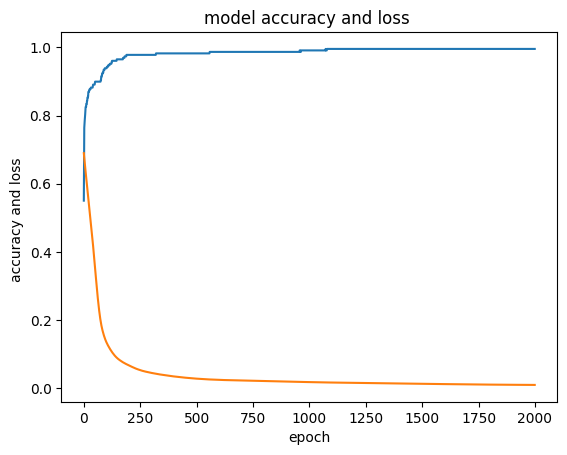

In [20]:
#visualizing the models accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("model accuracy and loss ")
plt.ylabel('accuracy and loss ')
plt.xlabel('epoch')

In [21]:
#getting the shape of the training and testing data
print("shape of the training data ",X_train.shape)
print("shape of the testing data ",X_test.shape)

shape of the training data  (229, 6)
shape of the testing data  (58, 6)


In [22]:
#showing the original and predicted values
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]

print("original : {0}".format(", ".join(str(x)for x in y_test)))
print("predicted : {0}".format(", ".join(str(x) for x in pred)))

2/2 [==============================] - 0s 6ms/step
original : 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0
predicted : 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0
